In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
mnist = fetch_openml('mnist_784', as_frame= False)


In [3]:
pictures, labels = mnist.data, mnist.target


In [4]:
def plot_digit(image_data):
    image = image_data.reshape(28,28,1)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

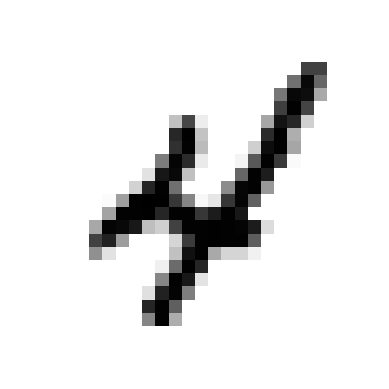

In [5]:
plot_digit(pictures[9])


In [6]:
x_train, x_test, y_train, y_test = train_test_split(pictures,labels)


In [21]:
svm_clf = SVC()
svm_clf.fit(x_train[:5000],y_train[:5000])


SVC()

In [22]:
preds = cross_val_predict(svm_clf,x_train[:5000], y_train[:5000])

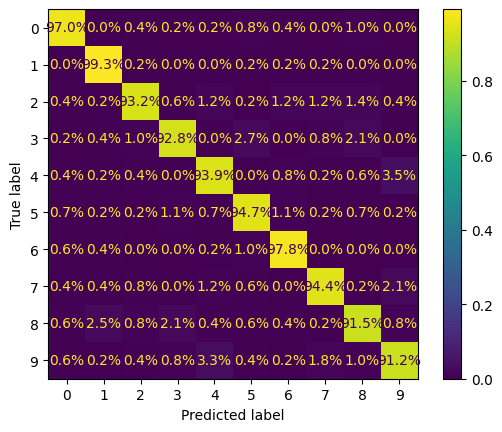

In [24]:
ConfusionMatrixDisplay.from_predictions(y_train[:5000], preds, normalize='true', values_format='.1%')


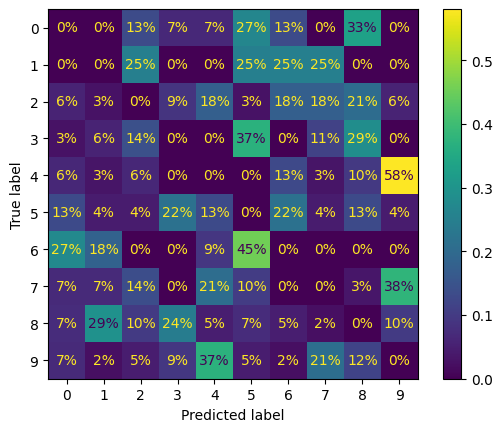

In [26]:
sample_weight = (preds != y_train[:5000])
ConfusionMatrixDisplay.from_predictions(y_train[:5000], preds, normalize='true', values_format='.0%', sample_weight=sample_weight)

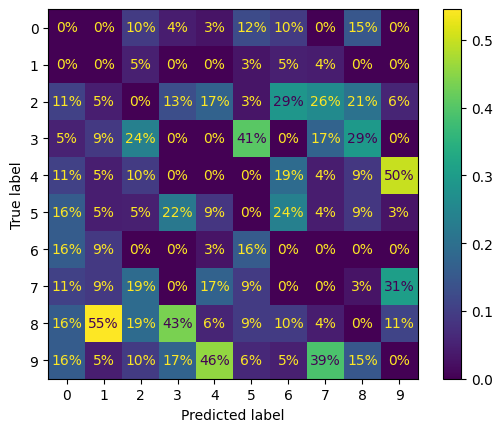

In [27]:
ConfusionMatrixDisplay.from_predictions(y_train[:5000], preds, normalize='pred', values_format='.0%', sample_weight=sample_weight)
